In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.fftpack as fft

# 1.1 

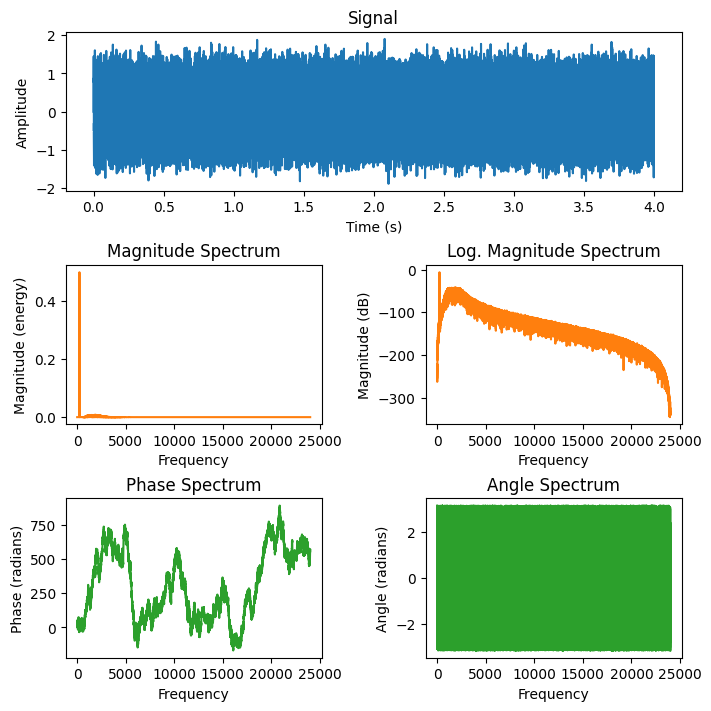

In [ ]:
wavPath = r"C:\Users\MICHA\DSPMusic\Class\Code\Assignment2\input_1.wav"
fs, s = wavfile.read(wavPath)

t = np.arange(len(s)) / fs

fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([
    ["signal", "signal"],
    ["magnitude", "log_magnitude"],
    ["phase", "angle"]
])

axs["signal"].set_title("Signal")
axs["signal"].plot(t, s, color="C0")
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")

axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(s, Fs=fs, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(s, Fs=fs, scale='dB', color='C1')

axs["phase"].set_title("Phase Spectrum")
axs["phase"].phase_spectrum(s, Fs=fs, color='C2')

axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(s, Fs=fs, color='C2')

plt.show()


# 1.2

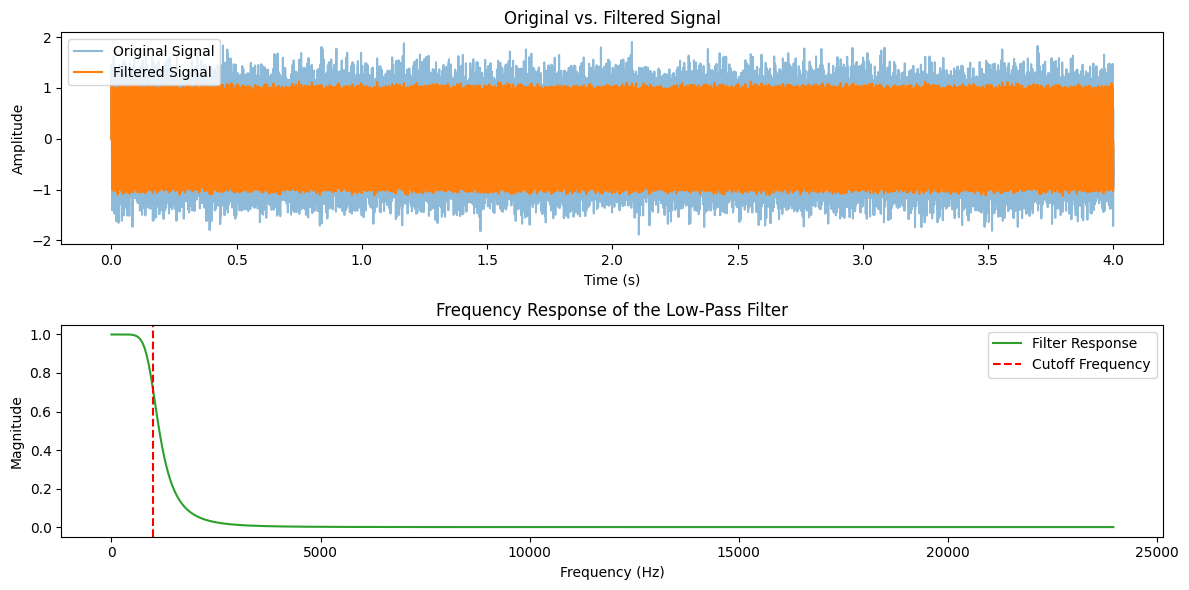

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, freqz

wavPath = r"C:\Users\MICHA\DSPMusic\Class\Code\Assignment2\input_1.wav"
fs, s = wavfile.read(wavPath)

if s.dtype == np.int16:
    s = s / np.max(np.abs(s))

nyquist = 0.5 * fs
cutoff_freq = 1000
order = 4

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    filtered_signal = filtfilt(b, a, data)
    return filtered_signal

y = butter_lowpass_filter(s, cutoff_freq, fs, order)

w, h = freqz(*butter(order, cutoff_freq / nyquist, btype="low"))
frequencies = (w / np.pi) * (fs / 2)


t = np.arange(len(s)) / fs

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.plot(t, s, label="Original Signal", alpha=0.5, color="C0")
plt.plot(t, y, label="Filtered Signal", color="C1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original vs. Filtered Signal")

plt.subplot(2,1,2)
plt.plot(frequencies, np.abs(h), label="Filter Response", color="C2")
plt.axvline(cutoff_freq, color='r', linestyle="--", label="Cutoff Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.title("Frequency Response of the Low-Pass Filter")

plt.tight_layout()
plt.show()


# 1.3

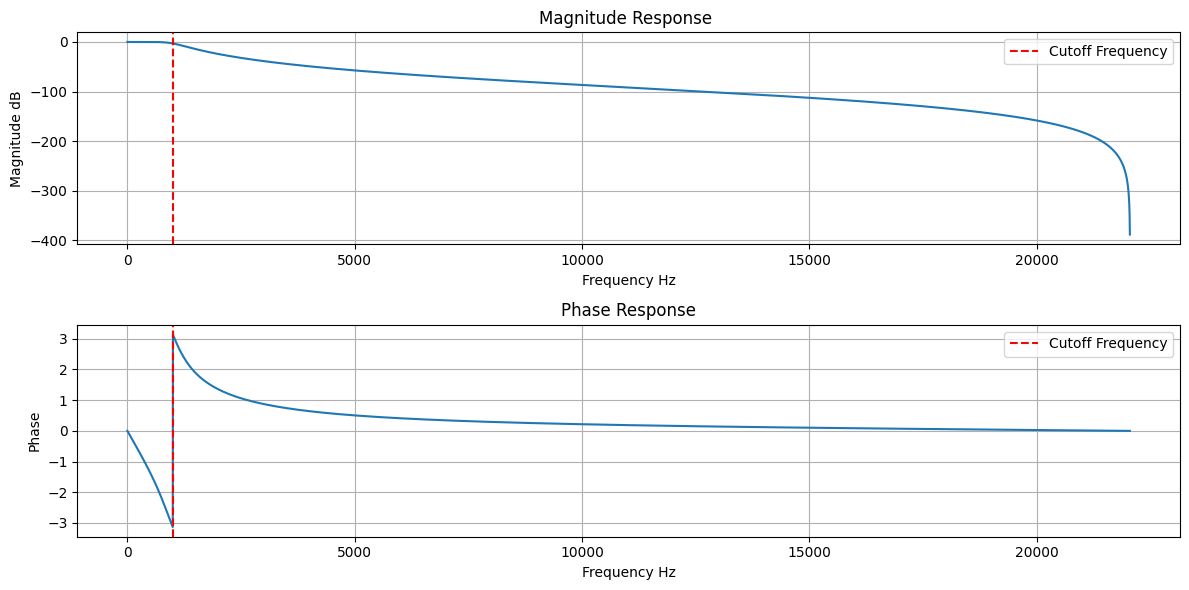

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

fs = 44100
cutoff_freq = 1000
order = 4

nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist
b, a = butter(order, normal_cutoff, btype="low", analog=False)

w, h = freqz(b, a, worN = 8000)
frequencies = (w / np.pi) * nyquist

phase_response = np.angle(h)

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.plot(frequencies, 20 * np.log10(abs(h)))
plt.axvline(cutoff_freq, color="r", linestyle="--", label = "Cutoff Frequency")
plt.title("Magnitude Response ")
plt.xlabel("Frequency Hz")
plt.ylabel("Magnitude dB")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(frequencies, phase_response)
plt.axvline(cutoff_freq, color="r", linestyle="--", label = "Cutoff Frequency")
plt.title("Phase Response")
plt.xlabel("Frequency Hz")
plt.ylabel("Phase")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 1.4 

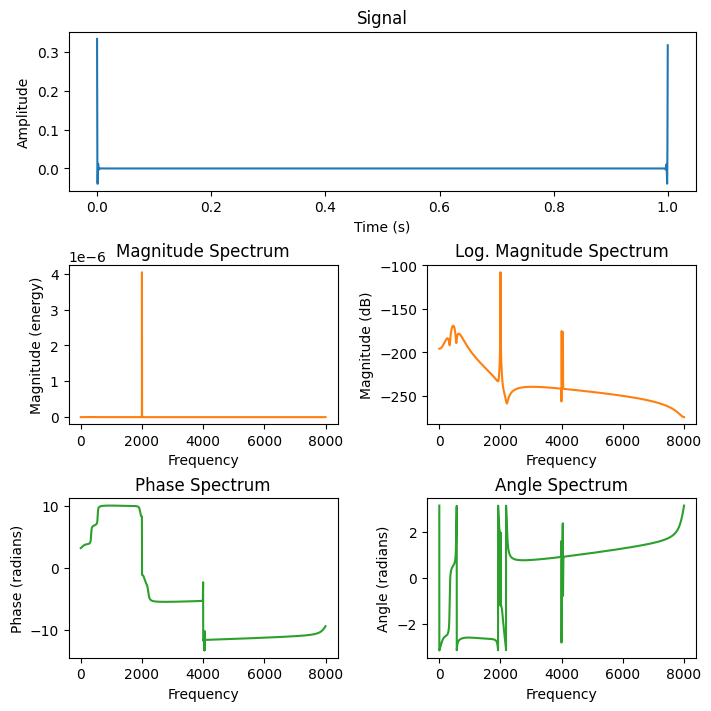

In [28]:
samplerate = 16000
duration = 2
n = samplerate * duration
timeAxis  = np.linspace(0, duration, samplerate)

freq1 = 1000
freq2 = 2000
freq3 = 2020

sineWave1 = 0.5 * np.sin(2 * np.pi * freq1 * timeAxis)
cosWave1 = 0.25 * np.cos(2 * np.pi * freq2 * timeAxis)
sineWave2 = 0.25 * np.sin(2 * np.pi * freq3 * timeAxis)

waveSum = sineWave1 + sineWave2 + cosWave1
waveSum = waveSum / np.max(waveSum)

nyquist = 0.5 * samplerate
cutoff_freq = 500
order = 4

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    filtered_signal = filtfilt(b, a, data)
    return filtered_signal

y = butter_lowpass_filter(waveSum, cutoff_freq, fs, order)

t = np.arange(len(y)) / samplerate

fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([
    ["signal", "signal"],
    ["magnitude", "log_magnitude"],
    ["phase", "angle"]
])

axs["signal"].set_title("Signal")
axs["signal"].plot(t, y)
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")

axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(y, Fs=samplerate, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(y, Fs=samplerate, scale='dB', color='C1')

axs["phase"].set_title("Phase Spectrum")
axs["phase"].phase_spectrum(y, Fs=samplerate, color='C2')

axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(y, Fs=samplerate, color='C2')

plt.show()

wavfile.write("1.4_wavefile.wav", samplerate, y.astype(np.int16))

